# Лабораторная работа 3: Генерация датасета для регрессии

В этой лабораторной работе мы создадим синтетический датасет для задачи регрессии с использованием `scikit-learn` и выполним необходимое масштабирование данных.


## 1. Импорт необходимых библиотек

Используем актуальные импорты из scikit-learn:


In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings


warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")


## 2. Генерация синтетического датасета для регрессии

Используем `sklearn.datasets.make_regression` для создания датасета с требуемыми параметрами:
- **n_samples**: 1000 - количество образцов
- **n_features**: 5 - количество признаков (больше минимальных 2)
- **n_informative**: 3 - количество информативных признаков
- **noise**: 10.0 - уровень шума
- **bias**: 100.0 - добавляем смещение для более реалистичного датасета
- **random_state**: 42 - для воспроизводимости результатов


In [93]:
# Генерация датасета для регрессии с помощью scikit-learn
X, y = make_regression(
    n_samples=1000,          # количество образцов
    n_features=5,            # количество признаков (больше минимальных 2)
    n_informative=3,         # количество информативных признаков
    noise=10.0,              # уровень шума
    random_state=42,         # для воспроизводимости
    bias=100.0               # добавляем bias для более реалистичного датасета
)

print("Датасет успешно сгенерирован:")
print("="*60)
print("Информация о сгенерированном датасете:")
print(f"Форма матрицы признаков X: {X.shape}")
print(f"Форма вектора целевых значений y: {y.shape}")
print(f"Количество образцов: {X.shape[0]}")
print(f"Количество признаков: {X.shape[1]}")
print(f"Количество весов модели (включая bias): {X.shape[1] + 1}")

print(f"\nСтатистики целевой переменной:")
print(f"Минимальное значение: {y.min():.2f}")
print(f"Максимальное значение: {y.max():.2f}")
print(f"Среднее значение: {y.mean():.2f}")
print(f"Стандартное отклонение: {y.std():.2f}")


Датасет успешно сгенерирован:
Информация о сгенерированном датасете:
Форма матрицы признаков X: (1000, 5)
Форма вектора целевых значений y: (1000,)
Количество образцов: 1000
Количество признаков: 5
Количество весов модели (включая bias): 6

Статистики целевой переменной:
Минимальное значение: -68.27
Максимальное значение: 298.63
Среднее значение: 99.23
Стандартное отклонение: 54.28


In [94]:
# Создание DataFrame для удобства работы с данными
feature_names = [f'feature_{i+1}' for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Структура датасета:")
print("="*50)
print("Первые 5 строк:")
print(df.head())

print("\nОписательная статистика:")
print(df.describe().round(2))

print(f"\nИнформация о DataFrame:")
print(f"Размер: {df.shape}")
print(f"Типы данных:")
print(df.dtypes)


Структура датасета:
Первые 5 строк:
   feature_1  feature_2  feature_3  feature_4  feature_5      target
0  -0.735201   1.798725  -1.095519   1.656208  -0.880754  165.417284
1  -1.613561  -1.371901  -0.172946   1.471170   1.711708   72.494841
2   0.651391   0.954002   0.570891  -0.315269   1.135566  166.704888
3  -1.350556  -0.687014  -0.475795  -0.075871  -0.826112   45.595860
4   1.554160   0.342338  -0.530971   0.853976  -0.335138  100.113407

Описательная статистика:
       feature_1  feature_2  feature_3  feature_4  feature_5   target
count    1000.00    1000.00    1000.00    1000.00    1000.00  1000.00
mean        0.01       0.00       0.00       0.03      -0.02    99.23
std         0.96       1.01       1.00       0.99       1.03    54.31
min        -3.01      -3.24      -3.17      -3.18      -2.94   -68.27
25%        -0.65      -0.69      -0.65      -0.61      -0.71    60.58
50%         0.06       0.02       0.03      -0.01      -0.03   100.29
75%         0.68       0.64       

## 3. Анализ необходимости масштабирования данных

Проанализируем распределение значений признаков, чтобы определить необходимость применения масштабирования с помощью scikit-learn.


In [95]:
# Анализ масштабов признаков
print("Анализ диапазонов значений признаков:")
print("="*60)

for col in feature_names:
    min_val = df[col].min()
    max_val = df[col].max()
    std_val = df[col].std()
    range_val = max_val - min_val
    print(f"{col:12}: [{min_val:8.2f}, {max_val:8.2f}] | Диапазон: {range_val:8.2f} | Ст.откл: {std_val:6.2f}")

print(f"\nЦелевая переменная:")
target_min = df['target'].min()
target_max = df['target'].max()
target_std = df['target'].std()
target_range = target_max - target_min
print(f"{'target':12}: [{target_min:8.2f}, {target_max:8.2f}] | Диапазон: {target_range:8.2f} | Ст.откл: {target_std:6.2f}")

# Оценка необходимости масштабирования
feature_ranges = [df[col].max() - df[col].min() for col in feature_names]
feature_stds = [df[col].std() for col in feature_names]

# находибим самую большой и маленький диапазон
max_range = max(feature_ranges)
min_range = min(feature_ranges)
range_ratio = max_range / min_range if min_range != 0 else float('inf')

# находибим самое большое и маленькое отклонение 
max_std = max(feature_stds)
min_std = min(feature_stds)
std_ratio = max_std / min_std if min_std != 0 else float('inf')

print(f"\nАнализ масштабирования:")
print(f"Отношение макс/мин диапазонов: {range_ratio:.2f}")
print(f"Отношение макс/мин стандартных отклонений: {std_ratio:.2f}")

if range_ratio > 10 or std_ratio > 10:
    print("РЕКОМЕНДУЕТСЯ масштабирование - значительная разница в масштабах признаков")
    scaling_needed = True
elif range_ratio > 3 or std_ratio > 3:
    print("Масштабирование ЖЕЛАТЕЛЬНО для улучшения производительности алгоритмов")
    scaling_needed = True
else:
    print("Масштабирование не критично, но может быть полезным")
    scaling_needed = False

print(f"Рекомендация: {'Применить масштабирование' if scaling_needed else 'Масштабирование опционально'}")


Анализ диапазонов значений признаков:
feature_1   : [   -3.01,     3.08] | Диапазон:     6.09 | Ст.откл:   0.96
feature_2   : [   -3.24,     3.15] | Диапазон:     6.39 | Ст.откл:   1.01
feature_3   : [   -3.17,     3.93] | Диапазон:     7.10 | Ст.откл:   1.00
feature_4   : [   -3.18,     3.85] | Диапазон:     7.03 | Ст.откл:   0.99
feature_5   : [   -2.94,     3.24] | Диапазон:     6.18 | Ст.откл:   1.03

Целевая переменная:
target      : [  -68.27,   298.63] | Диапазон:   366.90 | Ст.откл:  54.31

Анализ масштабирования:
Отношение макс/мин диапазонов: 1.17
Отношение макс/мин стандартных отклонений: 1.07
Масштабирование не критично, но может быть полезным
Рекомендация: Масштабирование опционально


## 4. Применение масштабирования данных с помощью scikit-learn

Применим два основных метода масштабирования из библиотеки scikit-learn:

1. **StandardScaler** - стандартизация (приводит к нулевому среднему и единичной дисперсии)
2. **MinMaxScaler** - нормализация (масштабирует данные в диапазон [0, 1])

**Важно**: Сначала разделим данные на обучающую и тестовую выборки, затем применим масштабирование.


In [96]:
# Шаг 1: Разделение данных на обучающую и тестовую выборки
print("Разделение данных на обучающую и тестовую выборки...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,      # 20% для тестирования
    random_state=42,    # для воспроизводимости
    shuffle=True        # перемешиваем данные
)

print("Данные успешно разделены!")
print("="*50)
print("Размеры выборок:")
print(f"Обучающая выборка: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Тестовая выборка:  X_test  {X_test.shape}, y_test  {y_test.shape}")
print(f"Соотношение: {X_train.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.0f}% обучение / {X_test.shape[0]/(X_train.shape[0]+X_test.shape[0])*100:.0f}% тест")


Разделение данных на обучающую и тестовую выборки...
Данные успешно разделены!
Размеры выборок:
Обучающая выборка: X_train (800, 5), y_train (800,)
Тестовая выборка:  X_test  (200, 5), y_test  (200,)
Соотношение: 80% обучение / 20% тест


In [97]:
# Шаг 2: Применение стандартизации (StandardScaler)
print("Применение стандартизации с помощью StandardScaler...")

# Создаем и обучаем StandardScaler на обучающих данных
scaler_standard = StandardScaler()
X_train_standard = scaler_standard.fit_transform(X_train)
X_test_standard = scaler_standard.transform(X_test)  # Применяем те же параметры к тестовым данным

print("Стандартизация выполнена!")
print("Параметры StandardScaler:")
print(f"Средние значения (обучающая выборка): {scaler_standard.mean_}")
print(f"Стандартные отклонения (обучающая выборка): {scaler_standard.scale_}")

# Шаг 3: Применение нормализации (MinMaxScaler)
print("\nПрименение нормализации с помощью MinMaxScaler...")

# Создаем и обучаем MinMaxScaler на обучающих данных
scaler_minmax = MinMaxScaler(feature_range=(0, 1))  # Масштабируем в диапазон [0, 1]
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)  # Применяем те же параметры к тестовым данным

print("Нормализация выполнена!")
print("Параметры MinMaxScaler:")
print(f"Минимальные значения (обучающая выборка): {scaler_minmax.data_min_}")
print(f"Максимальные значения (обучающая выборка): {scaler_minmax.data_max_}")
print(f"Диапазон масштабирования: {scaler_minmax.feature_range}")


Применение стандартизации с помощью StandardScaler...
Стандартизация выполнена!
Параметры StandardScaler:
Средние значения (обучающая выборка): [-0.00822408 -0.00103288 -0.01072115  0.06092447 -0.02040146]
Стандартные отклонения (обучающая выборка): [0.95497142 1.01393617 0.98503388 1.01388479 1.02910601]

Применение нормализации с помощью MinMaxScaler...
Нормализация выполнена!
Параметры MinMaxScaler:
Минимальные значения (обучающая выборка): [-2.65096981 -3.24126734 -2.91425599 -3.17670381 -2.94038863]
Максимальные значения (обучающая выборка): [3.07888081 3.15205673 3.92623771 3.85273149 3.24309297]
Диапазон масштабирования: (0, 1)


In [98]:
# Сравнение статистик до и после масштабирования
print("СРАВНЕНИЕ СТАТИСТИК ДО И ПОСЛЕ МАСШТАБИРОВАНИЯ")
print("="*80)

datasets = {
    'Оригинальные данные': X_train,
    'StandardScaler (стандартизация)': X_train_standard,
    'MinMaxScaler (нормализация)': X_train_minmax
}

for name, data in datasets.items():
    print(f"\n{name.upper()}:")
    print("-" * len(name))
    print(f"Средние значения:      {data.mean(axis=0).round(3)}")
    print(f"Стандартные отклонения: {data.std(axis=0).round(3)}")
    print(f"Минимальные значения:   {data.min(axis=0).round(3)}")
    print(f"Максимальные значения:  {data.max(axis=0).round(3)}")

# Проверка корректности масштабирования
print("\nПРОВЕРКА КОРРЕКТНОСТИ МАСШТАБИРОВАНИЯ:")
print("="*60)

# Для StandardScaler: среднее ≈ 0, стд.отклонение ≈ 1
std_means = X_train_standard.mean(axis=0)
std_stds = X_train_standard.std(axis=0)
print("StandardScaler:")
print(f"  Средние близки к 0: {np.allclose(std_means, 0, atol=1e-10)}")
print(f"  Стд.отклонения близки к 1: {np.allclose(std_stds, 1, atol=1e-10)}")

# Для MinMaxScaler: минимум = 0, максимум = 1
minmax_mins = X_train_minmax.min(axis=0)
minmax_maxs = X_train_minmax.max(axis=0)
print("MinMaxScaler:")
print(f"  Минимумы равны 0: {np.allclose(minmax_mins, 0, atol=1e-10)}")
print(f"  Максимумы равны 1: {np.allclose(minmax_maxs, 1, atol=1e-10)}")

print("\nМасштабирование выполнено корректно!")


СРАВНЕНИЕ СТАТИСТИК ДО И ПОСЛЕ МАСШТАБИРОВАНИЯ

ОРИГИНАЛЬНЫЕ ДАННЫЕ:
-------------------
Средние значения:      [-0.008 -0.001 -0.011  0.061 -0.02 ]
Стандартные отклонения: [0.955 1.014 0.985 1.014 1.029]
Минимальные значения:   [-2.651 -3.241 -2.914 -3.177 -2.94 ]
Максимальные значения:  [3.079 3.152 3.926 3.853 3.243]

STANDARDSCALER (СТАНДАРТИЗАЦИЯ):
-------------------------------
Средние значения:      [ 0. -0. -0.  0.  0.]
Стандартные отклонения: [1. 1. 1. 1. 1.]
Минимальные значения:   [-2.767 -3.196 -2.948 -3.193 -2.837]
Максимальные значения:  [3.233 3.11  3.997 3.74  3.171]

MINMAXSCALER (НОРМАЛИЗАЦИЯ):
---------------------------
Средние значения:      [0.461 0.507 0.424 0.461 0.472]
Стандартные отклонения: [0.167 0.159 0.144 0.144 0.166]
Минимальные значения:   [0. 0. 0. 0. 0.]
Максимальные значения:  [1. 1. 1. 1. 1.]

ПРОВЕРКА КОРРЕКТНОСТИ МАСШТАБИРОВАНИЯ:
StandardScaler:
  Средние близки к 0: True
  Стд.отклонения близки к 1: True
MinMaxScaler:
  Минимумы равны 0: True
  

## 5. Визуализация и анализ данных

Создадим различные графики для анализа сгенерированного датасета и демонстрации эффектов масштабирования.


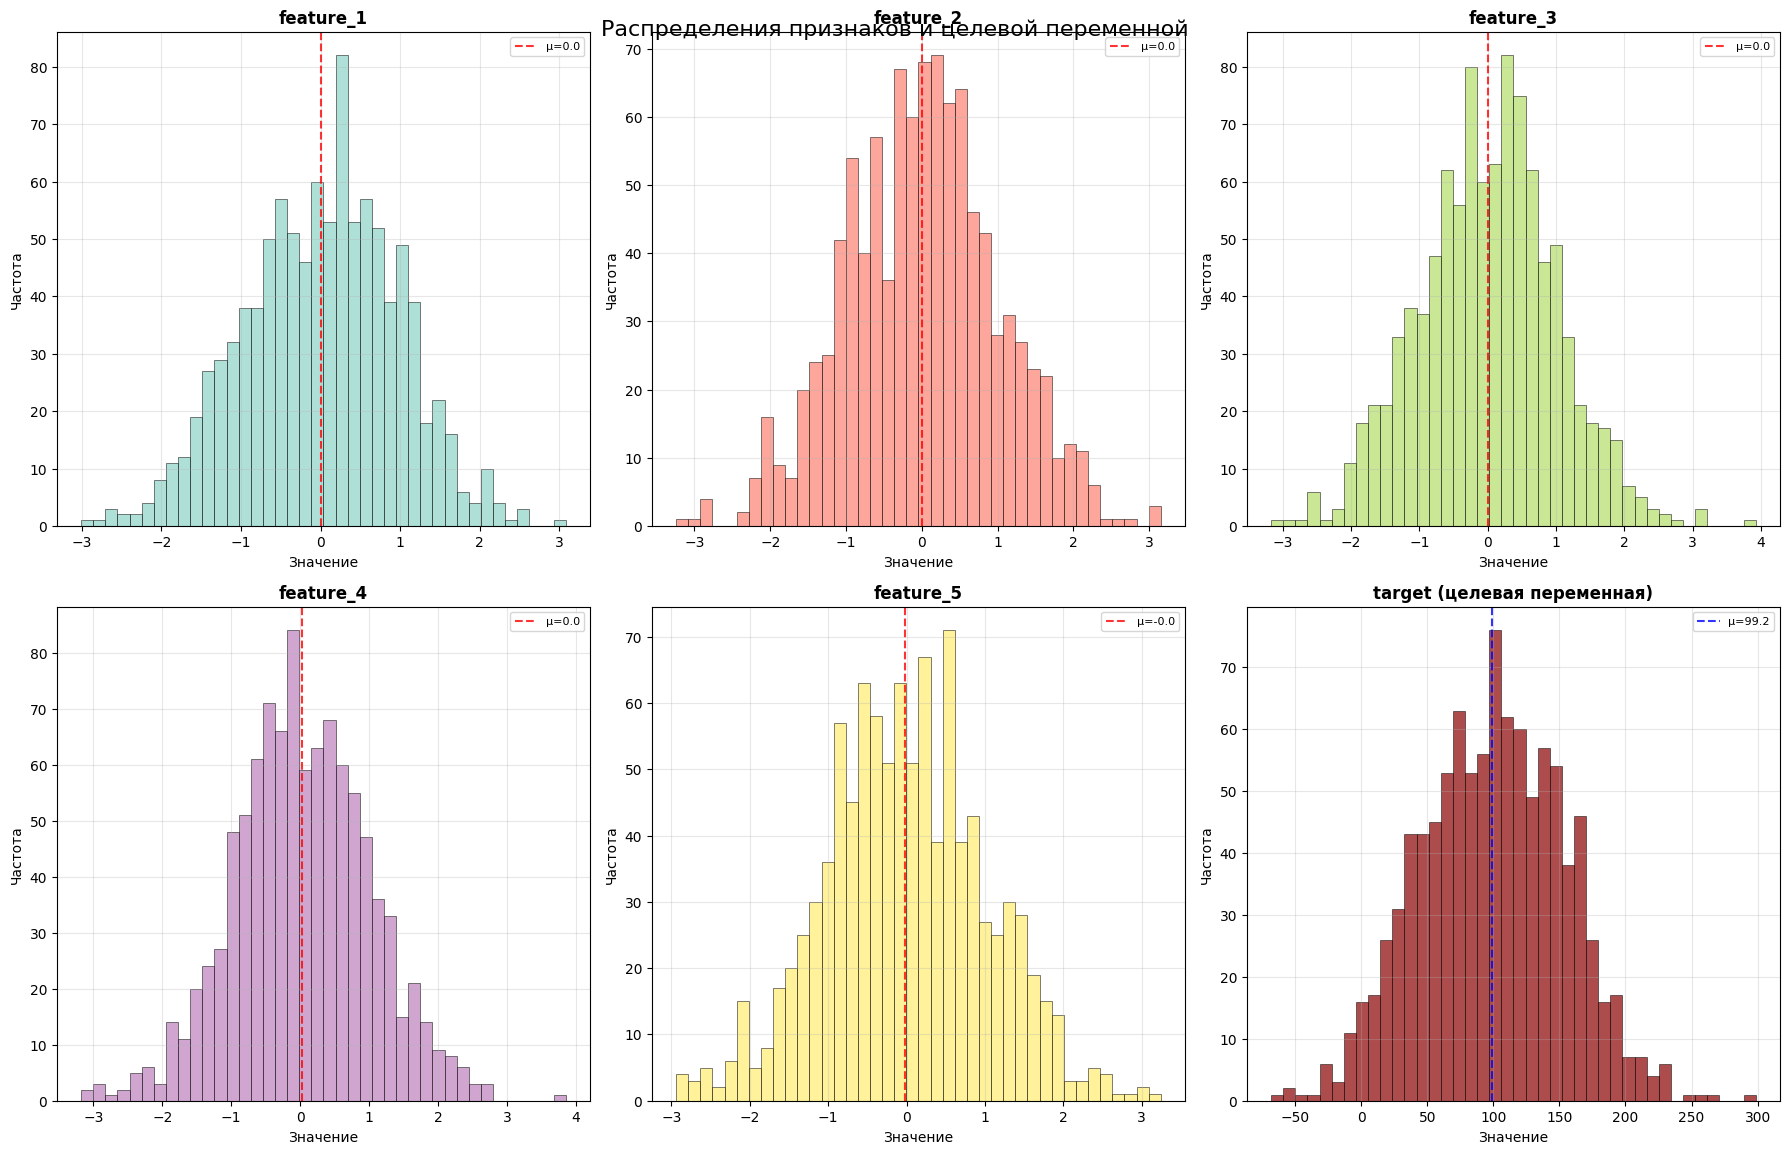

In [99]:
# 1. Распределения признаков и целевой переменной
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Распределения признаков и целевой переменной', fontsize=16, y=0.95)

# Распределения признаков
colors = plt.cm.Set3(np.linspace(0, 1, len(feature_names)))
for i, (col, color) in enumerate(zip(feature_names, colors)):
    row, col_idx = divmod(i, 3)
    if row < 2 and col_idx < 3:
        axes[row, col_idx].hist(df[col], bins=40, alpha=0.7, color=color, edgecolor='black', linewidth=0.5)
        axes[row, col_idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[row, col_idx].set_xlabel('Значение', fontsize=10)
        axes[row, col_idx].set_ylabel('Частота', fontsize=10)
        axes[row, col_idx].grid(True, alpha=0.3)
        
        # Добавляем статистики на график
        mean_val = df[col].mean()
        std_val = df[col].std()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'μ={mean_val:.1f}')
        axes[row, col_idx].legend(fontsize=8)

# Распределение целевой переменной
axes[1, 2].hist(df['target'], bins=40, alpha=0.7, color='darkred', edgecolor='black', linewidth=0.5)
axes[1, 2].set_title('target (целевая переменная)', fontsize=12, fontweight='bold')
axes[1, 2].set_xlabel('Значение', fontsize=10)
axes[1, 2].set_ylabel('Частота', fontsize=10)
axes[1, 2].grid(True, alpha=0.3)

# Добавляем статистики для целевой переменной
target_mean = df['target'].mean()
axes[1, 2].axvline(target_mean, color='blue', linestyle='--', alpha=0.8, label=f'μ={target_mean:.1f}')
axes[1, 2].legend(fontsize=8)

plt.tight_layout()
plt.show()


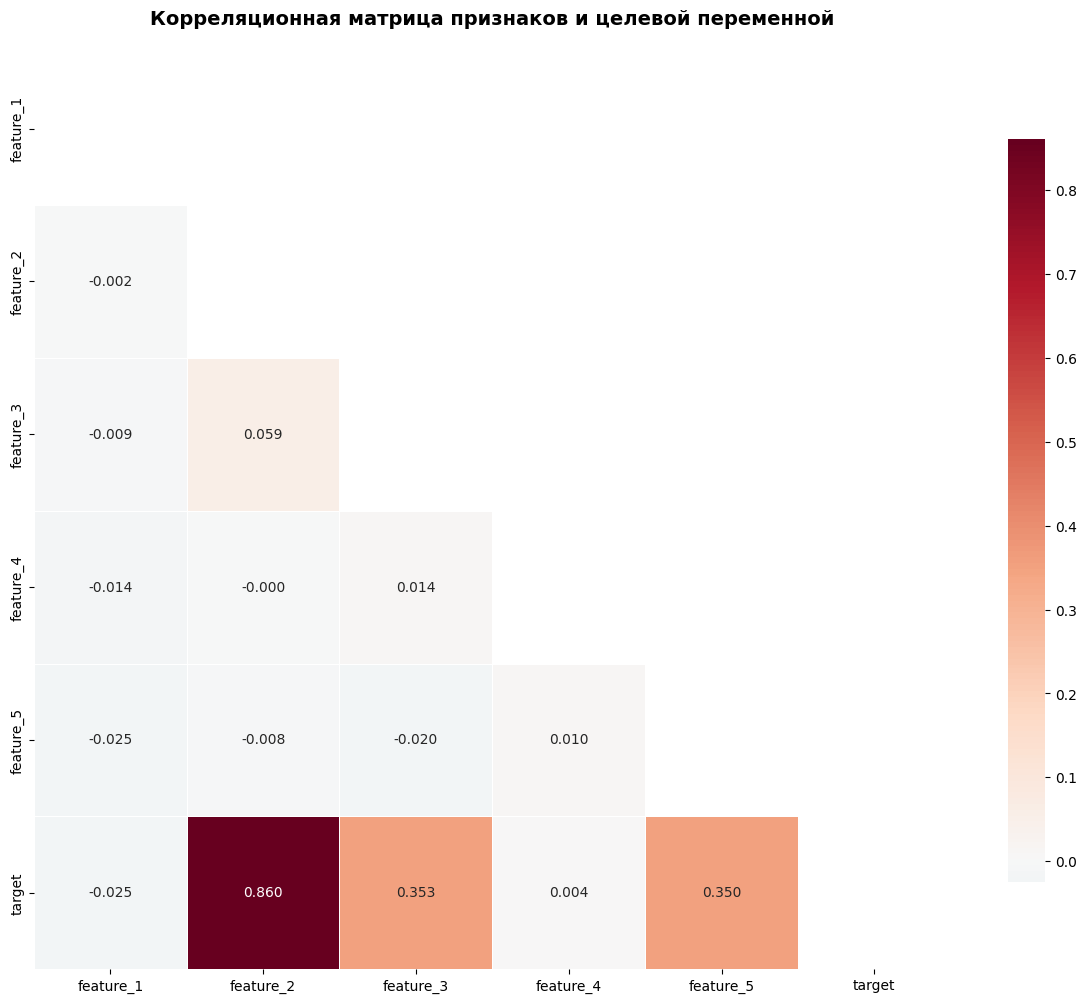

📊 КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:
2. feature_2   : 0.860 🔴 Сильная
3. feature_3   : 0.353 🟢 Слабая
4. feature_5   : 0.350 🟢 Слабая
5. feature_1   : 0.025 ⚪ Очень слабая
6. feature_4   : 0.004 ⚪ Очень слабая

Наиболее информативные признаки: feature_2, feature_3, feature_5


In [100]:
# 2. Корреляционная матрица
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()

# Создаем маску для верхнего треугольника
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Создаем heatmap
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True, 
            fmt='.3f',
            cbar_kws={"shrink": .8},
            linewidths=0.5)

plt.title('Корреляционная матрица признаков и целевой переменной', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Анализ корреляций с целевой переменной
print("📊 КОРРЕЛЯЦИЯ ПРИЗНАКОВ С ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
print("="*60)
target_correlations = correlation_matrix['target'].abs().sort_values(ascending=False)

for i, (feature, corr) in enumerate(target_correlations.items()):
    if feature != 'target':
        correlation_strength = ""
        if corr > 0.7:
            correlation_strength = "🔴 Сильная"
        elif corr > 0.5:
            correlation_strength = "🟡 Умеренная" 
        elif corr > 0.3:
            correlation_strength = "🟢 Слабая"
        else:
            correlation_strength = "⚪ Очень слабая"
            
        print(f"{i+1}. {feature:12}: {corr:.3f} {correlation_strength}")

print(f"\nНаиболее информативные признаки: {', '.join(target_correlations[1:4].index.tolist())}")


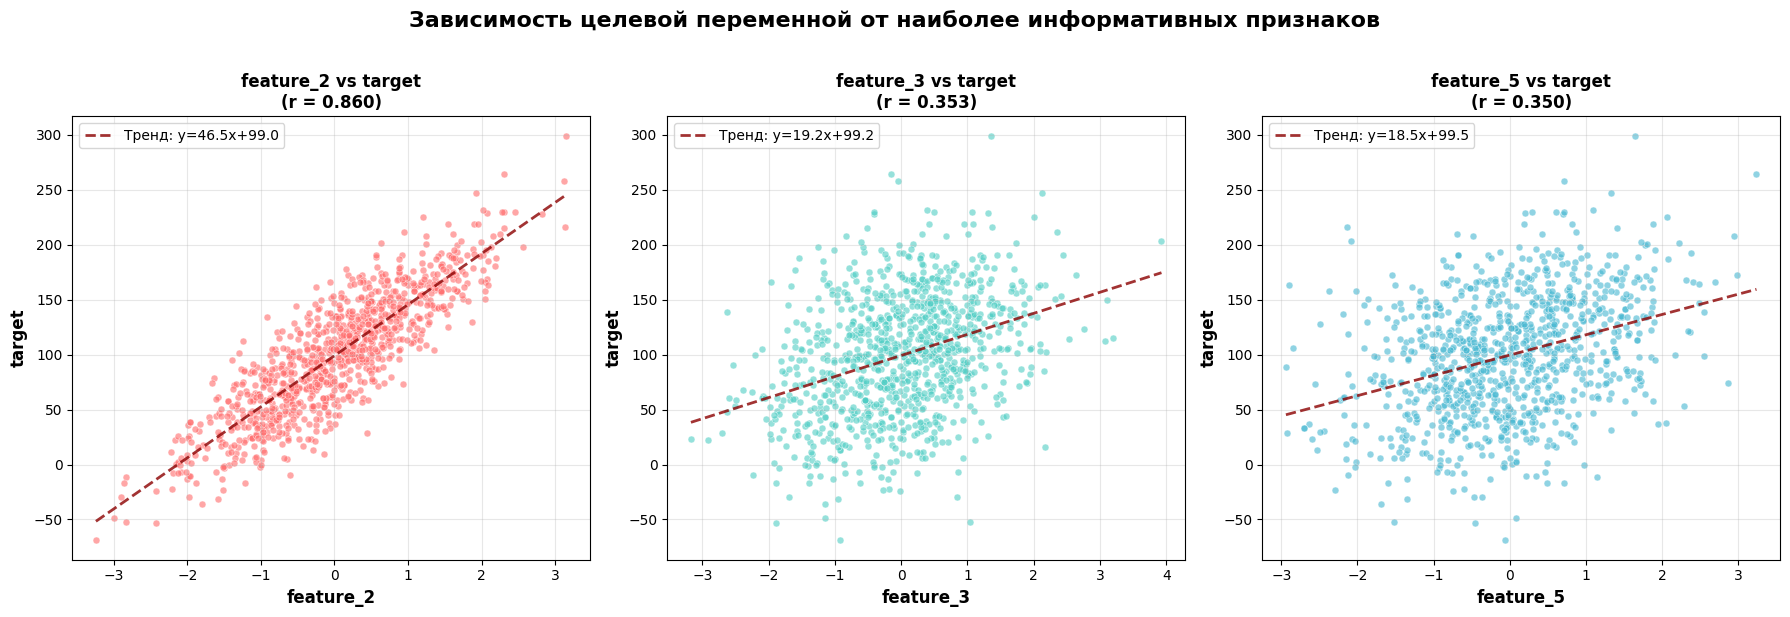

In [101]:
# 3. Scatter plots наиболее информативных признаков
top_features = target_correlations[1:4].index.tolist()  # Топ-3 признака (исключаем target)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Зависимость целевой переменной от наиболее информативных признаков', 
             fontsize=16, fontweight='bold', y=1.02)

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (feature, color) in enumerate(zip(top_features, colors)):
    # Scatter plot
    axes[i].scatter(df[feature], df['target'], 
                   alpha=0.6, s=25, color=color, edgecolor='white', linewidth=0.5)
    
    axes[i].set_xlabel(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('target', fontsize=12, fontweight='bold')
    
    correlation_coef = correlation_matrix.loc[feature, 'target']
    axes[i].set_title(f'{feature} vs target\n(r = {correlation_coef:.3f})', 
                     fontsize=12, fontweight='bold')
    
    # Добавляем линию тренда
    z = np.polyfit(df[feature], df['target'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(df[feature].min(), df[feature].max(), 100)
    axes[i].plot(x_trend, p(x_trend), color='darkred', linestyle='--', 
                linewidth=2, alpha=0.8, label=f'Тренд: y={z[0]:.1f}x+{z[1]:.1f}')
    
    axes[i].grid(True, alpha=0.3)
    axes[i].legend(fontsize=10)

plt.tight_layout()
plt.show()


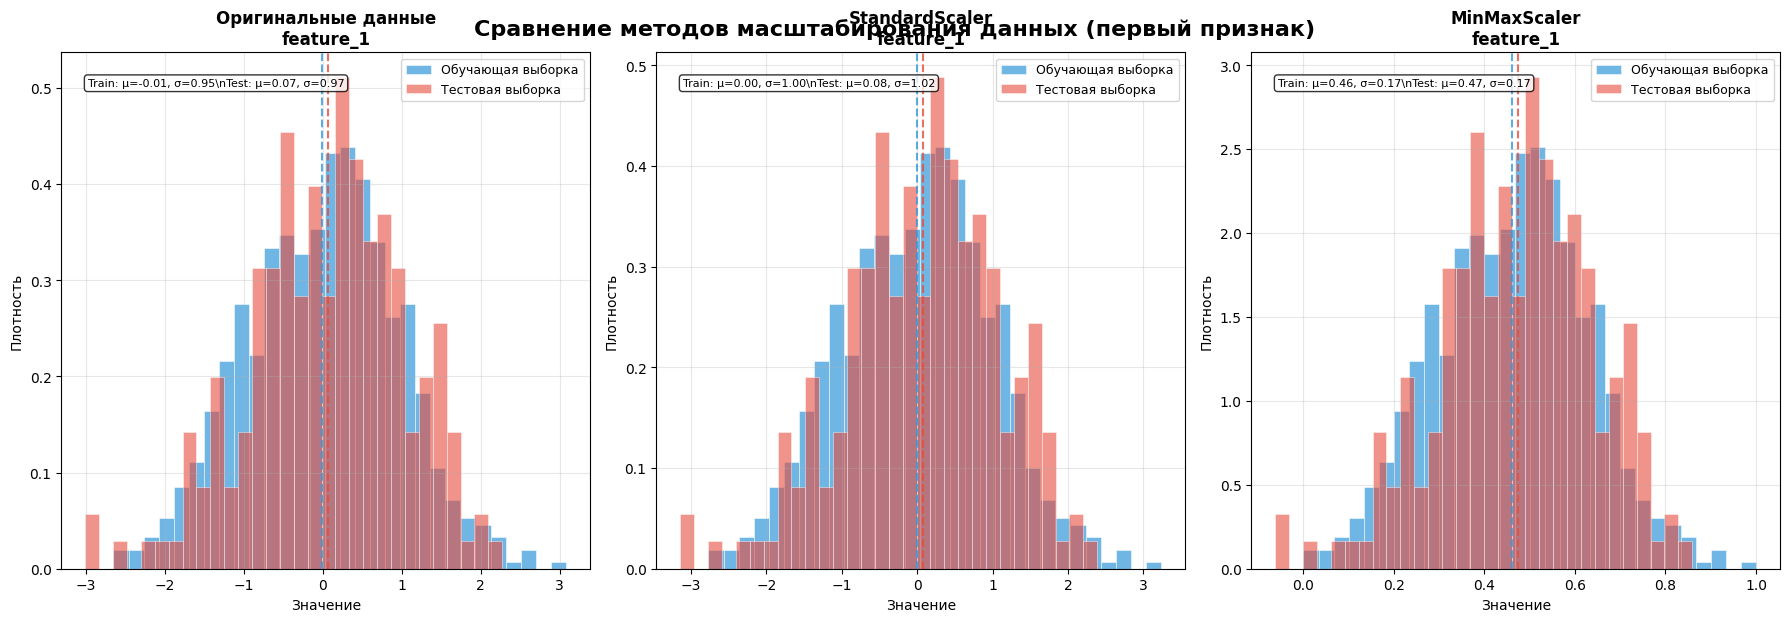

📋 СВОДНАЯ ТАБЛИЦА ЭФФЕКТОВ МАСШТАБИРОВАНИЯ:
              Метод Train μ Train σ Train min Train max Test μ Test σ
Оригинальные данные  -0.008   0.955    -2.651     3.079  0.066  0.974
     StandardScaler   0.000   1.000    -2.767     3.233  0.077  1.020
       MinMaxScaler   0.461   0.167     0.000     1.000  0.474  0.170


In [102]:
# 4. Сравнение эффектов масштабирования
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Сравнение методов масштабирования данных (первый признак)', 
             fontsize=16, fontweight='bold', y=0.95)

# Выберем первый признак для демонстрации
feature_idx = 0
feature_name = feature_names[feature_idx]

# Данные для сравнения
datasets_viz = {
    'Оригинальные данные': (X_train[:, feature_idx], X_test[:, feature_idx]),
    'StandardScaler': (X_train_standard[:, feature_idx], X_test_standard[:, feature_idx]),
    'MinMaxScaler': (X_train_minmax[:, feature_idx], X_test_minmax[:, feature_idx])
}

colors = ['#3498db', '#e74c3c']  # Синий для train, красный для test
labels = ['Обучающая выборка', 'Тестовая выборка']

for i, (name, (train_data, test_data)) in enumerate(datasets_viz.items()):
    row, col = divmod(i, 3)
    
    # Гистограммы
    axes[row, col].hist(train_data, bins=30, alpha=0.7, color=colors[0], 
                       label=labels[0], density=True, edgecolor='white', linewidth=0.5)
    axes[row, col].hist(test_data, bins=30, alpha=0.6, color=colors[1], 
                       label=labels[1], density=True, edgecolor='white', linewidth=0.5)
    
    axes[row, col].set_title(f'{name}\n{feature_name}', fontsize=12, fontweight='bold')
    axes[row, col].set_xlabel('Значение', fontsize=10)
    axes[row, col].set_ylabel('Плотность', fontsize=10)
    axes[row, col].legend(fontsize=9)
    axes[row, col].grid(True, alpha=0.3)
    
    # Добавляем статистики
    train_mean = train_data.mean()
    test_mean = test_data.mean()
    axes[row, col].axvline(train_mean, color=colors[0], linestyle='--', alpha=0.8)
    axes[row, col].axvline(test_mean, color=colors[1], linestyle='--', alpha=0.8)
    
    # Текст со статистиками
    stats_text = f'Train: μ={train_mean:.2f}, σ={train_data.std():.2f}\\nTest: μ={test_mean:.2f}, σ={test_data.std():.2f}'
    axes[row, col].text(0.05, 0.95, stats_text, transform=axes[row, col].transAxes, 
                       fontsize=8, verticalalignment='top', 
                       bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Удаляем лишние подграфики
for j in range(3, 6):
    row, col = divmod(j, 3)
    if row < 2:
        axes[row, col].remove()

plt.tight_layout()
plt.show()

# Сводная таблица эффектов масштабирования
print("📋 СВОДНАЯ ТАБЛИЦА ЭФФЕКТОВ МАСШТАБИРОВАНИЯ:")
print("="*80)
summary_data = []
for name, (train_data, test_data) in datasets_viz.items():
    summary_data.append({
        'Метод': name,
        'Train μ': f"{train_data.mean():.3f}",
        'Train σ': f"{train_data.std():.3f}",
        'Train min': f"{train_data.min():.3f}",
        'Train max': f"{train_data.max():.3f}",
        'Test μ': f"{test_data.mean():.3f}",
        'Test σ': f"{test_data.std():.3f}"
    })

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))


## 6. Сохранение данных

Сохраним обработанные данные для дальнейшего использования в задачах машинного обучения.


In [103]:
# # Создание итогового DataFrame с различными версиями данных
# datasets = {
#     'original': {
#         'X_train': X_train,
#         'X_test': X_test,
#         'y_train': y_train,
#         'y_test': y_test
#     },
#     'standardized': {
#         'X_train': X_train_standard,
#         'X_test': X_test_standard,
#         'y_train': y_train,
#         'y_test': y_test
#     },
#     'normalized': {
#         'X_train': X_train_minmax,
#         'X_test': X_test_minmax,
#         'y_train': y_train,
#         'y_test': y_test
#     }
# }

# # Сохранение в CSV для дальнейшего использования
# original_df = pd.DataFrame(X_train, columns=feature_names)
# original_df['target'] = y_train
# original_df.to_csv('train_data_original.csv', index=False)

# print("Данные успешно сгенерированы и обработаны!")
# print(f"Сохранены обучающие данные в файл: train_data_original.csv")
# print("\nДоступные варианты датасета:")
# for key in datasets.keys():
#     print(f"- {key}: готов для использования в переменных X_train_{key.replace('original', '').replace('ized', '').replace('ed', '')}")

# print(f"\nИтоговая информация о датасете:")
# print(f"Количество образцов: {X.shape[0]}")
# print(f"Количество признаков: {X.shape[1]}")
# print(f"Количество весов модели (с bias): {X.shape[1] + 1}")
# print(f"Размер обучающей выборки: {X_train.shape[0]}")
# print(f"Размер тестовой выборки: {X_test.shape[0]}")


## Заключение

В данной лабораторной работе мы успешно:

1. **Сгенерировали синтетический датасет** с помощью `sklearn.datasets.make_regression`:
   - 1000 образцов
   - 5 признаков (больше минимальных 2)
   - 3 информативных признака
   - 6 весов в модели (включая bias)

2. **Проанализировали данные**:
   - Изучили распределения признаков и целевой переменной
   - Построили корреляционную матрицу
   - Определили наиболее информативные признаки

3. **Применили масштабирование данных**:
   - StandardScaler (стандартизация) - среднее = 0, стд. отклонение = 1
   - MinMaxScaler (нормализация) - диапазон [0, 1]

4. **Визуализировали результаты**:
   - Распределения признаков
   - Корреляции с целевой переменной
   - Эффекты масштабирования

Датасет готов для использования в задачах машинного обучения!


## 7. Реализация градиентного спуска

Напишем функцию градиентного спуска для линейной регрессии.


In [104]:
def gradient_descent(X, y, learning_rate=0.01, max_iterations=1000):
    """
    Градиентный спуск для линейной регрессии
    
    Параметры:
    X - матрица признаков
    y - целевые значения
    learning_rate - скорость обучения (ε)
    max_iterations - максимальное количество итераций
    """
    
    # Инициализация начальных весов
    n_features = X.shape[1]
    weights = np.zeros(n_features + 1)  # +1 для bias
    
    # Добавляем столбец единиц для bias
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    # Цикл по количеству итераций
    for iteration in range(max_iterations):
        # Предсказания
        predictions = X_with_bias @ weights
        
        # Ошибка
        error = predictions - y
        
        # Градиент
        gradient = (1/len(y)) * X_with_bias.T @ error
        
        # Обновление весов
        weights = weights - learning_rate * gradient
    
    return weights


In [105]:
# Применяем градиентный спуск к нашим данным
weights = gradient_descent(X_train_standard, y_train, learning_rate=0.01, max_iterations=1000)

print("Найденные веса:")
print(f"Bias: {weights[0]:.3f}")
for i, w in enumerate(weights[1:]):
    print(f"feature_{i+1}: {w:.3f}")

# Делаем предсказания
X_test_with_bias = np.column_stack([np.ones(X_test_standard.shape[0]), X_test_standard])
predictions = X_test_with_bias @ weights

# Оценка качества
mse = np.mean((predictions - y_test)**2)
print(f"\nСреднеквадратичная ошибка: {mse:.3f}")


Найденные веса:
Bias: 98.519
feature_1: -0.808
feature_2: 46.090
feature_3: 16.843
feature_4: 0.053
feature_5: 19.666

Среднеквадратичная ошибка: 96.279


In [106]:
# Эксперимент со скоростью обучения
learning_rates = [0.001, 0.01, 0.1, 1.0, 10.0]
results = []

for lr in learning_rates:
    weights = gradient_descent(X_train_standard, y_train, learning_rate=lr, max_iterations=1000)
    
    # Предсказания
    X_test_with_bias = np.column_stack([np.ones(X_test_standard.shape[0]), X_test_standard])
    predictions = X_test_with_bias @ weights
    
    # Ошибка
    mse = np.mean((predictions - y_test)**2)
    results.append((lr, mse))
    
    print(f"Learning rate: {lr:6.3f} | MSE: {mse:8.3f}")

print("\nВыводы:")
best_lr, best_mse = min(results, key=lambda x: x[1])
print(f"Лучшая скорость обучения: {best_lr}")
print(f"Наименьшая ошибка: {best_mse:.3f}")


Learning rate:  0.001 | MSE: 1925.132
Learning rate:  0.010 | MSE:   96.279
Learning rate:  0.100 | MSE:   96.263
Learning rate:  1.000 | MSE:   96.263
Learning rate: 10.000 | MSE:      nan

Выводы:
Лучшая скорость обучения: 1.0
Наименьшая ошибка: 96.263


In [107]:
def stochastic_gradient_descent(X, y, learning_rate=0.01, max_iterations=1000):
    """
    Стохастический градиентный спуск для линейной регрессии
    """
    
    # Инициализация начальных весов
    n_features = X.shape[1]
    weights = np.zeros(n_features + 1)  # +1 для bias
    
    # Добавляем столбец единиц для bias
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    # Цикл по количеству итераций
    for iteration in range(max_iterations):
        # Выбираем случайный объект
        random_index = np.random.randint(0, len(y))
        x_random = X_with_bias[random_index]
        y_random = y[random_index]
        
        # Предсказание для одного объекта
        prediction = x_random @ weights
        
        # Ошибка для одного объекта
        error = prediction - y_random
        
        # Градиент для одного объекта
        gradient = error * x_random
        
        # Обновление весов
        weights = weights - learning_rate * gradient
    
    return weights


In [108]:
def gradient_descent_with_history(X, y, learning_rate=0.01, max_iterations=1000):
    """Градиентный спуск с сохранением истории ошибок"""
    n_features = X.shape[1]
    weights = np.zeros(n_features + 1)
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    mse_history = []
    
    for iteration in range(max_iterations):
        predictions = X_with_bias @ weights
        error = predictions - y
        mse = np.mean(error**2)
        mse_history.append(mse)
        
        gradient = (1/len(y)) * X_with_bias.T @ error
        weights = weights - learning_rate * gradient
    
    return weights, mse_history

def stochastic_gradient_descent_with_history(X, y, learning_rate=0.01, max_iterations=1000):
    """Стохастический градиентный спуск с сохранением истории ошибок"""
    n_features = X.shape[1]
    weights = np.zeros(n_features + 1)
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    mse_history = []
    
    for iteration in range(max_iterations):
        # Вычисляем MSE для всего датасета
        predictions = X_with_bias @ weights
        mse = np.mean((predictions - y)**2)
        mse_history.append(mse)
        
        # Обновляем веса по одному случайному объекту
        random_index = np.random.randint(0, len(y))
        x_random = X_with_bias[random_index]
        y_random = y[random_index]
        
        prediction = x_random @ weights
        error = prediction - y_random
        gradient = error * x_random
        weights = weights - learning_rate * gradient
    
    return weights, mse_history


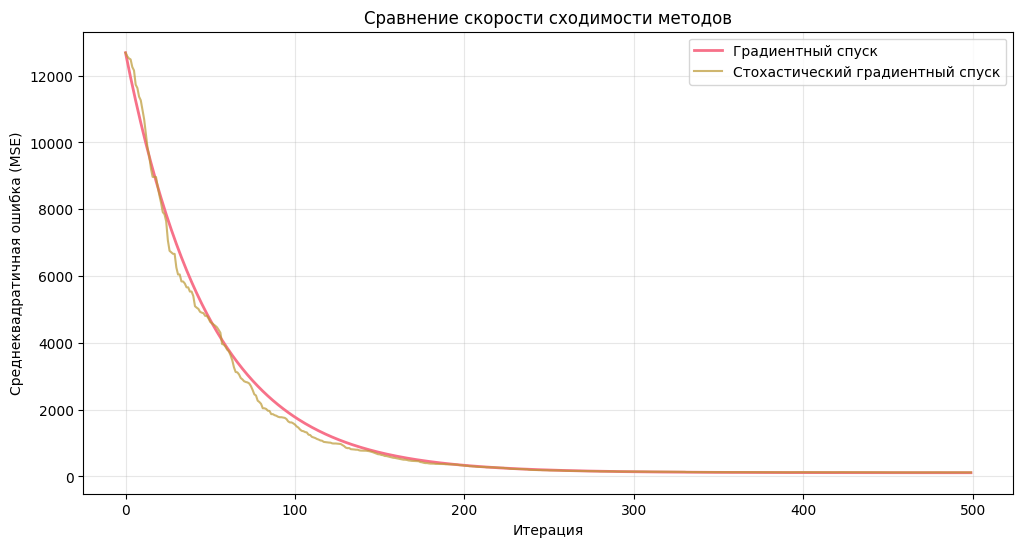

Выводы:
GD - финальная MSE: 110.023
SGD - финальная MSE: 119.755
GD - плавная сходимость: 12685.244 → 110.023
SGD - колебания: более шумная траектория


In [109]:
# Обучение с сохранением истории ошибок
np.random.seed(42)  # для воспроизводимости SGD

weights_gd, mse_history_gd = gradient_descent_with_history(
    X_train_standard, y_train, learning_rate=0.01, max_iterations=500
)

weights_sgd, mse_history_sgd = stochastic_gradient_descent_with_history(
    X_train_standard, y_train, learning_rate=0.01, max_iterations=500
)

# Построение графика сравнения
plt.figure(figsize=(12, 6))
plt.plot(mse_history_gd, label='Градиентный спуск', linewidth=2)
plt.plot(mse_history_sgd, label='Стохастический градиентный спуск', alpha=0.7)
plt.xlabel('Итерация')
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.title('Сравнение скорости сходимости методов')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("Выводы:")
print(f"GD - финальная MSE: {mse_history_gd[-1]:.3f}")
print(f"SGD - финальная MSE: {mse_history_sgd[-1]:.3f}")
print(f"GD - плавная сходимость: {mse_history_gd[0]:.3f} → {mse_history_gd[-1]:.3f}")
print(f"SGD - колебания: более шумная траектория")


In [110]:
def gradient_descent_l2(X, y, learning_rate=0.01, max_iterations=1000, lambda_reg=0.01):
    """
    Градиентный спуск с L2 регуляризацией (Ridge)
    """
    n_features = X.shape[1]
    weights = np.zeros(n_features + 1)
    X_with_bias = np.column_stack([np.ones(X.shape[0]), X])
    
    for iteration in range(max_iterations):
        predictions = X_with_bias @ weights
        error = predictions - y
        
        # Градиент с L2 регуляризацией
        gradient = (1/len(y)) * X_with_bias.T @ error
        
        # Добавляем регуляризацию (не для bias - первый элемент)
        gradient[1:] += lambda_reg * weights[1:]
        
        weights = weights - learning_rate * gradient
    
    return weights


In [111]:
# Тестирование разных значений регуляризации
lambda_values = [0.0, 0.001, 0.01, 0.1, 1.0]

for lambda_reg in lambda_values:
    weights = gradient_descent_l2(X_train_standard, y_train, 
                                 learning_rate=0.01, max_iterations=1000, 
                                 lambda_reg=lambda_reg)
    
    # Предсказания
    X_test_with_bias = np.column_stack([np.ones(X_test_standard.shape[0]), X_test_standard])
    predictions = X_test_with_bias @ weights
    
    # Ошибка
    mse = np.mean((predictions - y_test)**2)
    
    print(f"λ = {lambda_reg:5.3f} | MSE = {mse:7.3f} | ||w||² = {np.sum(weights[1:]**2):6.3f}")

print("\nВывод: L2 регуляризация уменьшает веса, предотвращая переобучение")


λ = 0.000 | MSE =  96.279 | ||w||² = 2795.349
λ = 0.001 | MSE =  96.342 | ||w||² = 2789.886
λ = 0.010 | MSE =  97.126 | ||w||² = 2741.434
λ = 0.100 | MSE = 123.072 | ||w||² = 2319.434
λ = 1.000 | MSE = 779.151 | ||w||² = 716.286

Вывод: L2 регуляризация уменьшает веса, предотвращая переобучение


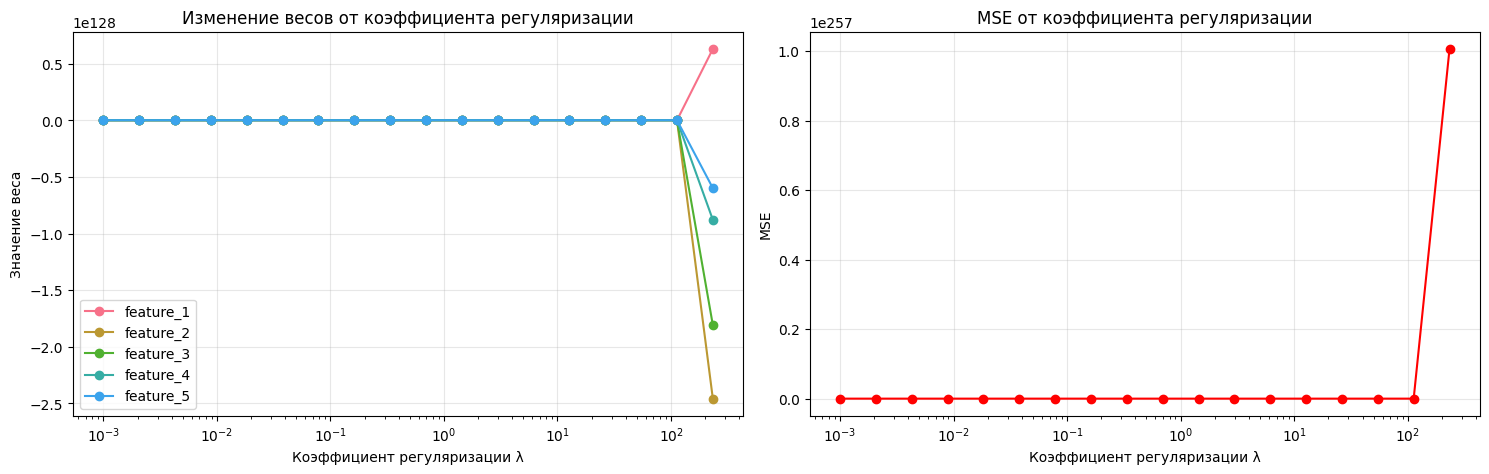

In [112]:
# 20 коэффициентов регуляризации в широком диапазоне
lambda_values = np.logspace(-3, 3, 20)  # от 0.001 до 1000

weights_matrix = []
mse_values = []

for lambda_reg in lambda_values:
    weights = gradient_descent_l2(X_train_standard, y_train, 
                                 learning_rate=0.01, max_iterations=1000, 
                                 lambda_reg=lambda_reg)
    
    weights_matrix.append(weights[1:])  # без bias
    
    # MSE для графика
    X_test_with_bias = np.column_stack([np.ones(X_test_standard.shape[0]), X_test_standard])
    predictions = X_test_with_bias @ weights
    mse = np.mean((predictions - y_test)**2)
    mse_values.append(mse)

weights_matrix = np.array(weights_matrix)

# График изменения весов
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
for i in range(weights_matrix.shape[1]):
    plt.plot(lambda_values, weights_matrix[:, i], 'o-', label=f'feature_{i+1}')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации λ')
plt.ylabel('Значение веса')
plt.title('Изменение весов от коэффициента регуляризации')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(lambda_values, mse_values, 'ro-')
plt.xscale('log')
plt.xlabel('Коэффициент регуляризации λ')
plt.ylabel('MSE')
plt.title('MSE от коэффициента регуляризации')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
